## Clustering on Chocolate Bar Ratings

#### Author: Andrew Tran

## Blog Post Inspiration and Objectives

In this blog post,...

## Data Preprocessing - Cleaning and Analytics

In [1]:
# Import needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
color = sns.color_palette()
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import MiniBatchKMeans, KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors
import kneed
from sklearn.decomposition import PCA
from sklearn.metrics import average_precision_score, roc_auc_score, precision_recall_fscore_support, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, pairwise_distances
plt.style.use("fivethirtyeight")

In [2]:
# Reading and displaying the initial dataset (ignoring any warnings or errors)
df = pd.read_csv("datasets/flavors_of_cacao.csv")
df

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India


In [3]:
# Determining the shape of the initial dataset
df.shape

(1795, 9)

In [4]:
# Getting a sample of the initial dataset through the seeing the first 10 entries
# completely in the dataset
df.head()

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [5]:
# Figuring out all of the columns (and their names) available for me to use in 
# the dataset
df.columns

Index(['Company \n(Maker-if known)', 'Specific Bean Origin\nor Bar Name',
       'REF', 'Review\nDate', 'Cocoa\nPercent', 'Company\nLocation', 'Rating',
       'Bean\nType', 'Broad Bean\nOrigin'],
      dtype='object')

In [6]:
# Getting basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Company 
(Maker-if known)         1795 non-null   object 
 1   Specific Bean Origin
or Bar Name  1795 non-null   object 
 2   REF                               1795 non-null   int64  
 3   Review
Date                       1795 non-null   int64  
 4   Cocoa
Percent                     1795 non-null   object 
 5   Company
Location                  1795 non-null   object 
 6   Rating                            1795 non-null   float64
 7   Bean
Type                         1794 non-null   object 
 8   Broad Bean
Origin                 1794 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


In [7]:
# Figuring out the number of duplicated elements in the dataset (could be 
# problematic if not resolved)
df.duplicated().sum()

0

In [8]:
# Renaming the columns to be more readable 
cols_rename_dict = {}
for col in df.columns:
    cols_rename_dict.update({col: col.replace("\n", " ")})
df = df.rename(columns=cols_rename_dict)

df.rename(columns={"REF": "Reference Number"}, inplace=True)

cols_rename_dict = {}
for col in df.columns:
    cols_rename_dict.update({col: col.replace(" (Maker-if known)", "")})
df = df.rename(columns=cols_rename_dict)
df.columns = df.columns.str.strip()

df

,Company,Specific Bean Origin or Bar Name,Reference Number,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India


In [9]:
# Figuring out the number of 'null'/'NaN' elements in the dataset (i.e. if NaN 
# filling is needed or not)
print(df.isnull().sum())
(df.isnull().sum() / df.shape[0]) * 100

Company                             0
Specific Bean Origin or Bar Name    0
Reference Number                    0
Review Date                         0
Cocoa Percent                       0
Company Location                    0
Rating                              0
Bean Type                           1
Broad Bean Origin                   1
dtype: int64


Company                             0.00000
Specific Bean Origin or Bar Name    0.00000
Reference Number                    0.00000
Review Date                         0.00000
Cocoa Percent                       0.00000
Company Location                    0.00000
Rating                              0.00000
Bean Type                           0.05571
Broad Bean Origin                   0.05571
dtype: float64

In [10]:
for col in df.columns:
    display(df[col].unique())

array(['A. Morin', 'Acalli', 'Adi', 'Aequare (Gianduja)', 'Ah Cacao',
       "Akesson's (Pralus)", 'Alain Ducasse', 'Alexandre',
       'Altus aka Cao Artisan', 'Amano', 'Amatller (Simon Coll)',
       'Amazona', 'Ambrosia', 'Amedei', 'AMMA', 'Anahata', 'Animas',
       'Ara', 'Arete', 'Artisan du Chocolat',
       'Artisan du Chocolat (Casa Luker)', 'Askinosie', 'Bahen & Co.',
       'Bakau', 'Bar Au Chocolat', "Baravelli's", 'Batch', 'Beau Cacao',
       'Beehive', 'Belcolade', 'Bellflower', 'Belyzium', 'Benoit Nihant',
       'Bernachon', 'Beschle (Felchlin)', 'Bisou', 'Bittersweet Origins',
       'Black Mountain', 'Black River (A. Morin)', 'Blanxart',
       'Blue Bandana', 'Bonnat', 'Bouga Cacao (Tulicorp)', 'Bowler Man',
       "Brasstown aka It's Chocolate", 'Brazen', 'Breeze Mill', 'Bright',
       'Britarev', 'Bronx Grrl Chocolate', 'Burnt Fork Bend',
       'Cacao Arabuco', 'Cacao Atlanta', 'Cacao Barry', 'Cacao de Origen',
       'Cacao de Origin', 'Cacao Hunters', 'Cacao M

array(['Agua Grande', 'Kpime', 'Atsane', ..., 'Indianer, Raw',
       'Kerala State', 'Brazil, Mitzi Blue'], dtype=object)

array([1876, 1676, 1680, 1704, 1315, 1319, 1011, 1015, 1019,  797, 1462,
       1470,  705,  370,  316,  636,  502,  508, 1215, 1061, 1173, 1944,
       1728, 1732, 1125, 1129, 1133,  725,  470,  544,  363,  304,  129,
        147,  175,  322,  327,  464, 1145, 1494, 1498,  979,  111,  123,
        170,   40,   75, 1065,  572, 1259, 1852, 1375, 1379, 1724, 1900,
       1904, 1908, 1924, 1928, 1534, 1598, 1602, 1193,  947,  729,  745,
        486,  531,  600,  355,  300, 1181, 1780,  647,  661,  331,  141,
       1474,  995,  999, 1454, 1554, 1295,  983,  955, 1840, 1868, 1880,
       1948, 1784, 1788,  586, 1800, 1804, 1864, 1768, 1141,  757,  773,
       1482, 1486,  963,  478,  558,  565,  414,  423,  431,  233,  256,
       1331, 1046, 1740, 1752, 1756,  911, 1912, 1339, 1418, 1038, 1042,
        629,  672,  761,  336,  395,  199,   24,   32,   48,   81,  341,
       1267, 1271, 1255, 1355, 1514, 1518, 1149, 1231, 1235, 1638, 1299,
       1303, 1323, 1606, 1716, 1688, 1692, 1391, 13

array([2016, 2015, 2014, 2013, 2012, 2011, 2009, 2010, 2017, 2008, 2007,
       2006], dtype=int64)

array(['63%', '70%', '60%', '80%', '88%', '72%', '55%', '75%', '65%',
       '85%', '73%', '64%', '66%', '68%', '50%', '100%', '77%', '90%',
       '71%', '83%', '78%', '74%', '76%', '86%', '82%', '69%', '91%',
       '42%', '61%', '73.5%', '62%', '67%', '58%', '60.5%', '79%', '81%',
       '57%', '72.5%', '56%', '46%', '89%', '99%', '84%', '53%', '87%'],
      dtype=object)

array(['France', 'U.S.A.', 'Fiji', 'Ecuador', 'Mexico', 'Switzerland',
       'Netherlands', 'Spain', 'Peru', 'Canada', 'Italy', 'Brazil',
       'U.K.', 'Australia', 'Wales', 'Belgium', 'Germany', 'Russia',
       'Puerto Rico', 'Venezuela', 'Colombia', 'Japan', 'New Zealand',
       'Costa Rica', 'South Korea', 'Amsterdam', 'Scotland', 'Martinique',
       'Sao Tome', 'Argentina', 'Guatemala', 'South Africa', 'Bolivia',
       'St. Lucia', 'Portugal', 'Singapore', 'Denmark', 'Vietnam',
       'Grenada', 'Israel', 'India', 'Czech Republic',
       'Domincan Republic', 'Finland', 'Madagascar', 'Philippines',
       'Sweden', 'Poland', 'Austria', 'Honduras', 'Nicaragua',
       'Lithuania', 'Niacragua', 'Chile', 'Ghana', 'Iceland', 'Eucador',
       'Hungary', 'Suriname', 'Ireland'], dtype=object)

array([3.75, 2.75, 3.  , 3.5 , 4.  , 3.25, 2.5 , 5.  , 1.75, 1.5 , 2.25,
       2.  , 1.  ])

array(['\xa0', 'Criollo', 'Trinitario', 'Forastero (Arriba)', 'Forastero',
       'Forastero (Nacional)', 'Criollo, Trinitario',
       'Criollo (Porcelana)', 'Blend', 'Trinitario (85% Criollo)',
       'Forastero (Catongo)', 'Forastero (Parazinho)',
       'Trinitario, Criollo', 'CCN51', 'Criollo (Ocumare)', 'Nacional',
       'Criollo (Ocumare 61)', 'Criollo (Ocumare 77)',
       'Criollo (Ocumare 67)', 'Criollo (Wild)', 'Beniano', 'Amazon mix',
       'Trinitario, Forastero', 'Forastero (Arriba) ASS', 'Criollo, +',
       'Amazon', 'Amazon, ICS', 'EET', 'Blend-Forastero,Criollo',
       'Trinitario (Scavina)', 'Criollo, Forastero', 'Matina',
       'Forastero(Arriba, CCN)', 'Nacional (Arriba)',
       'Forastero (Arriba) ASSS', 'Forastero, Trinitario',
       'Forastero (Amelonado)', nan, 'Trinitario, Nacional',
       'Trinitario (Amelonado)', 'Trinitario, TCGA', 'Criollo (Amarru)'],
      dtype=object)

array(['Sao Tome', 'Togo', 'Peru', 'Venezuela', 'Cuba', 'Panama',
       'Madagascar', 'Brazil', 'Ecuador', 'Colombia', 'Burma',
       'Papua New Guinea', 'Bolivia', 'Fiji', 'Mexico', 'Indonesia',
       'Trinidad', 'Vietnam', 'Nicaragua', 'Tanzania',
       'Dominican Republic', 'Ghana', 'Belize', '\xa0', 'Jamaica',
       'Grenada', 'Guatemala', 'Honduras', 'Costa Rica',
       'Domincan Republic', 'Haiti', 'Congo', 'Philippines', 'Malaysia',
       'Dominican Rep., Bali', 'Venez,Africa,Brasil,Peru,Mex', 'Gabon',
       'Ivory Coast', 'Carribean', 'Sri Lanka', 'Puerto Rico', 'Uganda',
       'Martinique', 'Sao Tome & Principe', 'Vanuatu', 'Australia',
       'Liberia', 'Ecuador, Costa Rica', 'West Africa', 'Hawaii',
       'St. Lucia', 'Cost Rica, Ven', 'Peru, Madagascar',
       'Venezuela, Trinidad', 'Trinidad, Tobago',
       'Ven, Trinidad, Ecuador', 'South America, Africa', 'India',
       'Africa, Carribean, C. Am.', 'Tobago', 'Ven., Indonesia, Ecuad.',
       'Trinidad-Tobago

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Company                           1795 non-null   object 
 1   Specific Bean Origin or Bar Name  1795 non-null   object 
 2   Reference Number                  1795 non-null   int64  
 3   Review Date                       1795 non-null   int64  
 4   Cocoa Percent                     1795 non-null   object 
 5   Company Location                  1795 non-null   object 
 6   Rating                            1795 non-null   float64
 7   Bean Type                         1794 non-null   object 
 8   Broad Bean Origin                 1794 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


In [12]:
df["Bean Type"].fillna("N/A", inplace=True)
df["Bean Type"].replace("\xa0", "N/A", inplace=True)

df["Broad Bean Origin"].fillna("N/A", inplace=True)
df["Broad Bean Origin"].replace("\xa0", "N/A", inplace=True)

df

,Company,Specific Bean Origin or Bar Name,Reference Number,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,N/A,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,N/A,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,N/A,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,N/A,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,N/A,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70%,Austria,3.75,N/A,Peru
1791,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62%,Austria,3.25,N/A,India


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Company                           1795 non-null   object 
 1   Specific Bean Origin or Bar Name  1795 non-null   object 
 2   Reference Number                  1795 non-null   int64  
 3   Review Date                       1795 non-null   int64  
 4   Cocoa Percent                     1795 non-null   object 
 5   Company Location                  1795 non-null   object 
 6   Rating                            1795 non-null   float64
 7   Bean Type                         1795 non-null   object 
 8   Broad Bean Origin                 1795 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


In [14]:
# Check to make sure if all NaN and also any unpreferred / unformatted values
# are resolved now
print(df.isnull().sum())
(df.isnull().sum() / df.shape[0]) * 100

Company                             0
Specific Bean Origin or Bar Name    0
Reference Number                    0
Review Date                         0
Cocoa Percent                       0
Company Location                    0
Rating                              0
Bean Type                           0
Broad Bean Origin                   0
dtype: int64


Company                             0.0
Specific Bean Origin or Bar Name    0.0
Reference Number                    0.0
Review Date                         0.0
Cocoa Percent                       0.0
Company Location                    0.0
Rating                              0.0
Bean Type                           0.0
Broad Bean Origin                   0.0
dtype: float64

In [15]:
df["Cocoa Percent"] = df["Cocoa Percent"].str.replace("%", "")
df["Cocoa Percent"] = df["Cocoa Percent"].apply("float64")
print(df["Cocoa Percent"].dtype)
df["Cocoa Percent"].unique()

float64


array([ 63. ,  70. ,  60. ,  80. ,  88. ,  72. ,  55. ,  75. ,  65. ,
        85. ,  73. ,  64. ,  66. ,  68. ,  50. , 100. ,  77. ,  90. ,
        71. ,  83. ,  78. ,  74. ,  76. ,  86. ,  82. ,  69. ,  91. ,
        42. ,  61. ,  73.5,  62. ,  67. ,  58. ,  60.5,  79. ,  81. ,
        57. ,  72.5,  56. ,  46. ,  89. ,  99. ,  84. ,  53. ,  87. ])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Company                           1795 non-null   object 
 1   Specific Bean Origin or Bar Name  1795 non-null   object 
 2   Reference Number                  1795 non-null   int64  
 3   Review Date                       1795 non-null   int64  
 4   Cocoa Percent                     1795 non-null   float64
 5   Company Location                  1795 non-null   object 
 6   Rating                            1795 non-null   float64
 7   Bean Type                         1795 non-null   object 
 8   Broad Bean Origin                 1795 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 126.3+ KB


C:\Users\andre\AppData\Local\Temp\ipykernel_27064\674198873.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=attribute, data=df, palette=sns.color_palette("husl", 8))
C:\Users\andre\AppData\Local\Temp\ipykernel_27064\674198873.py:4: UserWarning: 
The palette list has fewer values (8) than needed (416) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=attribute, data=df, palette=sns.color_palette("husl", 8))
c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


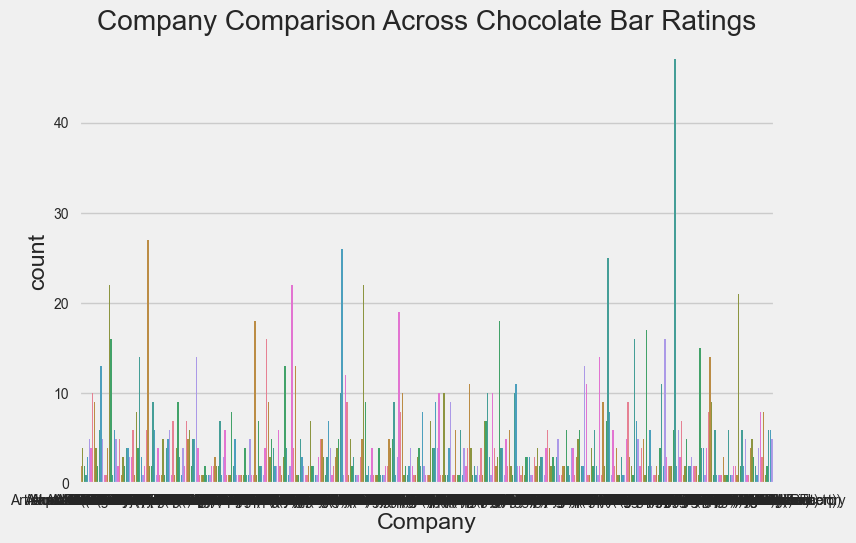

C:\Users\andre\AppData\Local\Temp\ipykernel_27064\674198873.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=attribute, data=df, palette=sns.color_palette("husl", 8))
C:\Users\andre\AppData\Local\Temp\ipykernel_27064\674198873.py:4: UserWarning: 
The palette list has fewer values (8) than needed (1039) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=attribute, data=df, palette=sns.color_palette("husl", 8))


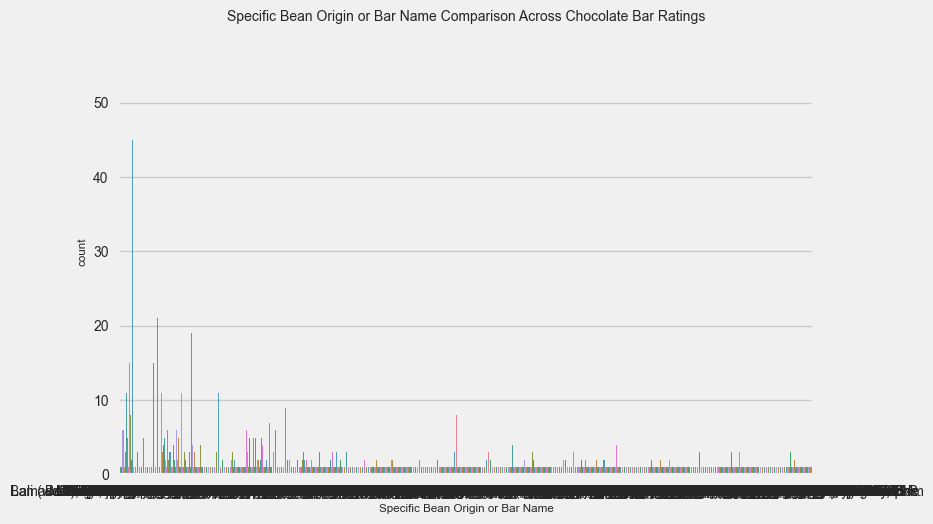

C:\Users\andre\AppData\Local\Temp\ipykernel_27064\674198873.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=attribute, data=df, palette=sns.color_palette("husl", 8))
C:\Users\andre\AppData\Local\Temp\ipykernel_27064\674198873.py:4: UserWarning: 
The palette list has fewer values (8) than needed (60) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=attribute, data=df, palette=sns.color_palette("husl", 8))


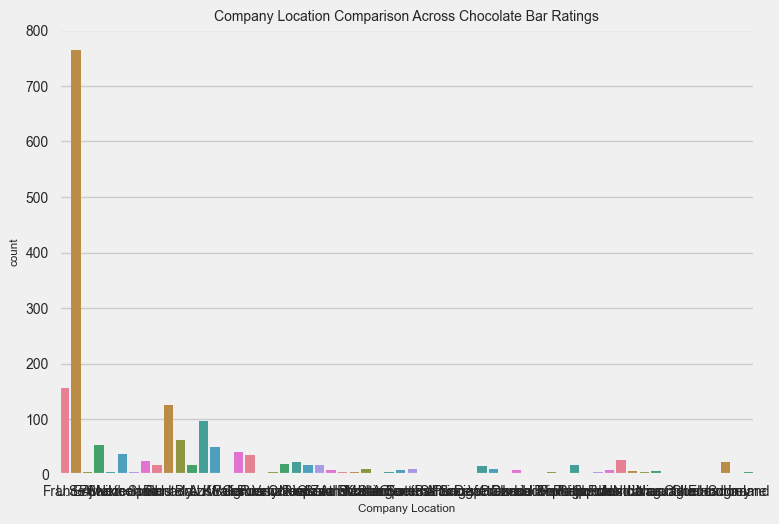

C:\Users\andre\AppData\Local\Temp\ipykernel_27064\674198873.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=attribute, data=df, palette=sns.color_palette("husl", 8))
C:\Users\andre\AppData\Local\Temp\ipykernel_27064\674198873.py:4: UserWarning: 
The palette list has fewer values (8) than needed (41) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=attribute, data=df, palette=sns.color_palette("husl", 8))


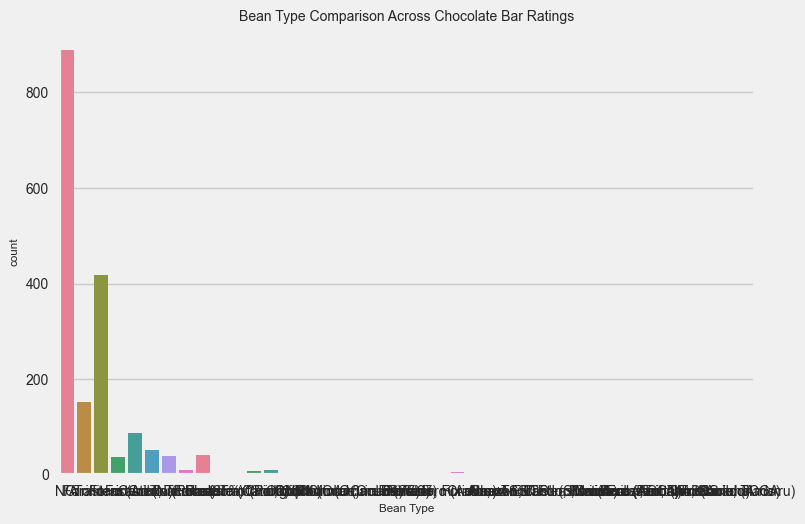

C:\Users\andre\AppData\Local\Temp\ipykernel_27064\674198873.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=attribute, data=df, palette=sns.color_palette("husl", 8))
C:\Users\andre\AppData\Local\Temp\ipykernel_27064\674198873.py:4: UserWarning: 
The palette list has fewer values (8) than needed (100) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=attribute, data=df, palette=sns.color_palette("husl", 8))


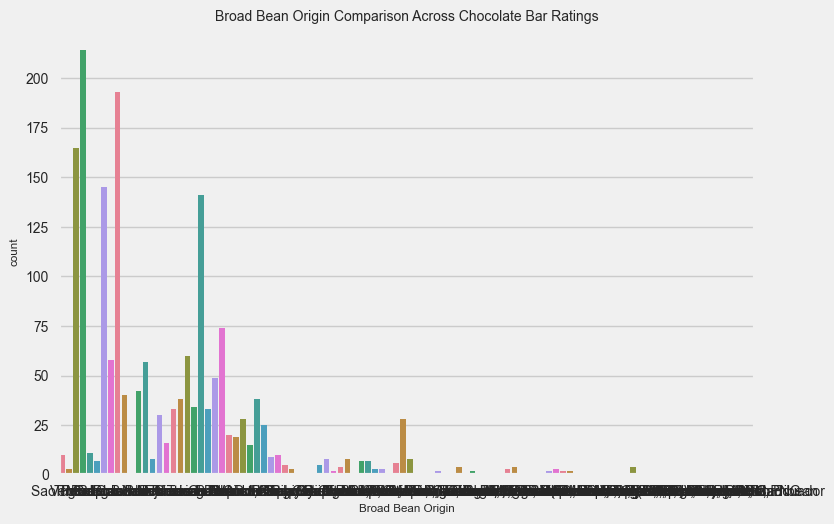

C:\Users\andre\AppData\Local\Temp\ipykernel_27064\674198873.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=attribute, data=df, palette=sns.color_palette("husl", 8))
C:\Users\andre\AppData\Local\Temp\ipykernel_27064\674198873.py:4: UserWarning: 
The palette list has fewer values (8) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=attribute, data=df, palette=sns.color_palette("husl", 8))


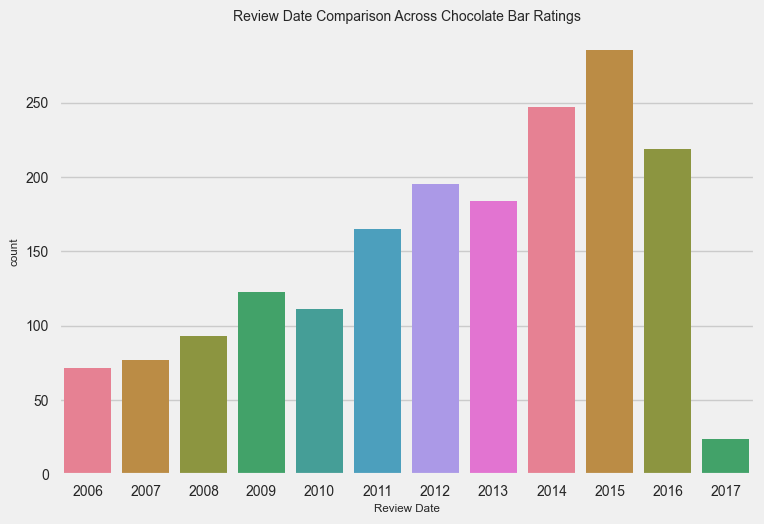

In [17]:
# Create bar graphs for descriptive statistics of the cars, figuring out how
# many fall into which group within each qualitative cateogry
def create_bar_graphs(attribute: str):
    sns.countplot(x=attribute, data=df, palette=sns.color_palette("husl", 8))
    plt.title(f"{attribute} Comparison Across Chocolate Bar Ratings")
    plt.rcParams["font.size"] = 7
    plt.show()

categorical_columns = ["Company", "Specific Bean Origin or Bar Name", "Company Location", "Bean Type", "Broad Bean Origin", "Review Date"]

for col in categorical_columns:
    create_bar_graphs(col)

In [18]:
review_date_min_year_val = df["Review Date"].min()
df["Review Date"] = df["Review Date"].map(lambda x: x - review_date_min_year_val)
df["Review Date"].unique()

array([10,  9,  8,  7,  6,  5,  3,  4, 11,  2,  1,  0], dtype=int64)

C:\Users\andre\AppData\Local\Temp\ipykernel_27064\3503189455.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df["Cocoa Percent"],


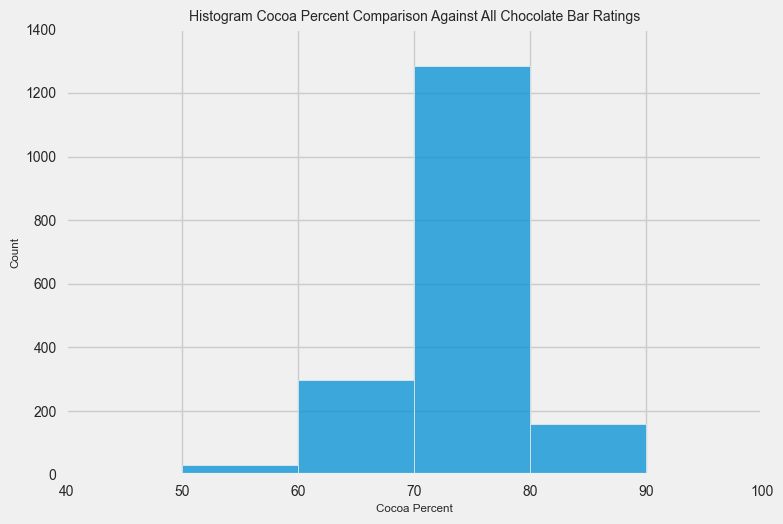

In [19]:
# Histogram plot illustrating the Cocoa Percent
bin_width = 10
df_cocoa_percent = df["Cocoa Percent"].round(0)
df_cocoa_percent = df_cocoa_percent.apply(int)
hist_low_range = (min(df_cocoa_percent) // 10) * 10
hist_high_range = (max(df_cocoa_percent) // 10) * 10

# # Set the style of seaborn
# sns.set(style="whitegrid")

sns.histplot(df["Cocoa Percent"], 
            bins=range(hist_low_range, hist_high_range, bin_width),
            kde=False,
            palette=sns.color_palette("husl", 8))
plt.rcParams["font.size"] = 7
plt.title("Histogram Cocoa Percent Comparison Against All Chocolate Bar Ratings")
plt.xlim(40, 100)
plt.ylim(0, 1400)
plt.show()

In [20]:
for col in df.columns:
    if not pd.api.types.is_numeric_dtype(df[col]):
        df[col] = pd.factorize(df[col])[0]

In [21]:
df

,Company,Specific Bean Origin or Bar Name,Reference Number,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,0,0,1876,10,63.0,0,3.75,0,0
1,0,1,1676,9,70.0,0,2.75,0,1
2,0,2,1676,9,70.0,0,3.00,0,1
3,0,3,1680,9,70.0,0,3.50,0,1
4,0,4,1704,9,70.0,0,3.50,0,2
...,...,...,...,...,...,...,...,...,...
1790,415,21,647,5,70.0,48,3.75,0,2
1791,415,100,749,5,65.0,48,3.00,4,31
1792,415,1037,749,5,65.0,48,3.50,4,57
1793,415,1037,781,5,62.0,48,3.25,0,57


In [22]:
df = df.drop(["Reference Number"], axis=1)
df

,Company,Specific Bean Origin or Bar Name,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,0,0,10,63.0,0,3.75,0,0
1,0,1,9,70.0,0,2.75,0,1
2,0,2,9,70.0,0,3.00,0,1
3,0,3,9,70.0,0,3.50,0,1
4,0,4,9,70.0,0,3.50,0,2
...,...,...,...,...,...,...,...,...
1790,415,21,5,70.0,48,3.75,0,2
1791,415,100,5,65.0,48,3.00,4,31
1792,415,1037,5,65.0,48,3.50,4,57
1793,415,1037,5,62.0,48,3.25,0,57


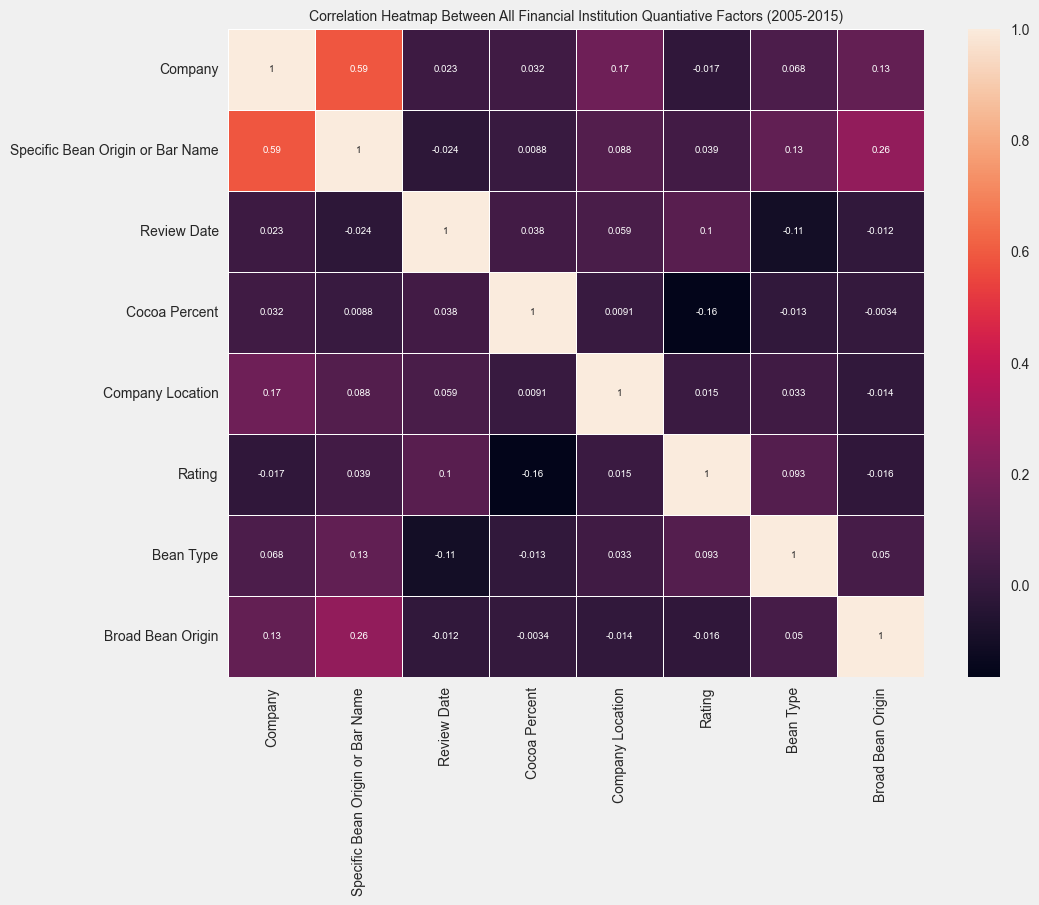

C:\Users\andre\AppData\Local\Temp\ipykernel_27064\3748371537.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_corr.index[1:], y=target_corr.values[1:], palette=sns.color_palette("husl", 8))
C:\Users\andre\AppData\Local\Temp\ipykernel_27064\3748371537.py:14: UserWarning: The palette list has more values (8) than needed (7), which may not be intended.
  sns.barplot(x=target_corr.index[1:], y=target_corr.values[1:], palette=sns.color_palette("husl", 8))


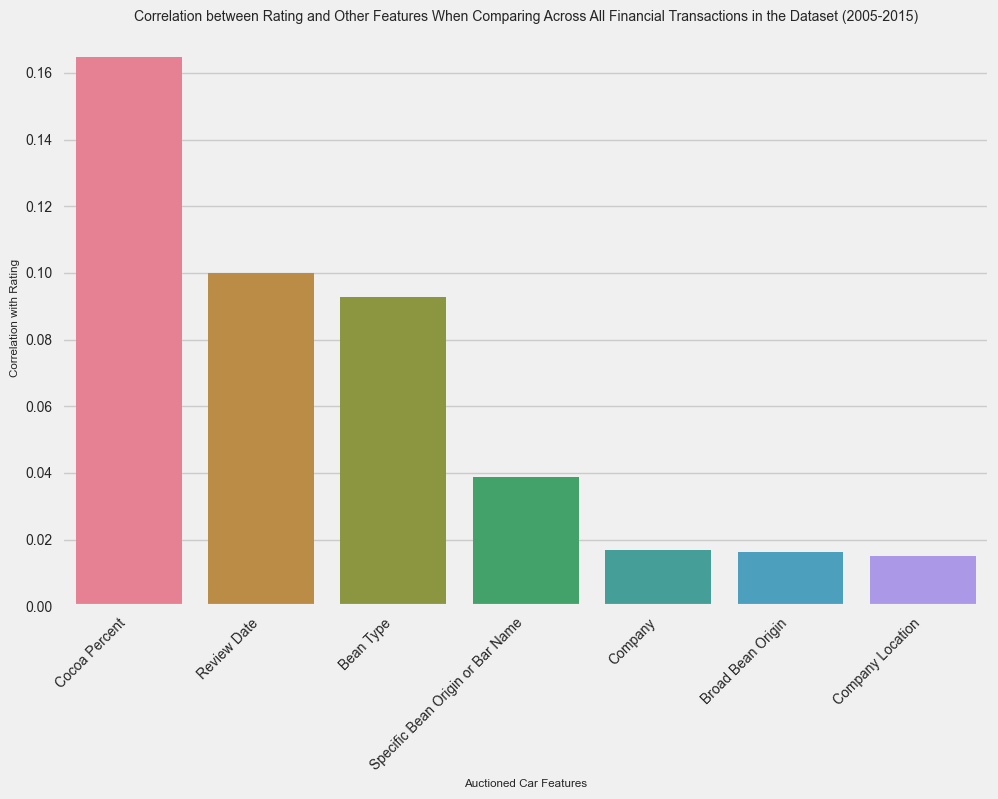

In [23]:
# Correlation heatmap to quantify relationships between auctioning used-car
# attributes
plt.figure(figsize=(10, 8))
plt.rcParams["font.size"] = 7
sns.heatmap(df.corr(), annot=True, linewidths=0.5)
plt.title("Correlation Heatmap Between All Financial Institution Quantiative Factors (2005-2015)")
plt.show()

# Correlation bar graph between ROI and all other auctioning used-car
# attributes
target_corr = df.corr()["Rating"].abs().sort_values(ascending=False)
plt.figure(figsize=(10, 8))
plt.rcParams["font.size"] = 7
sns.barplot(x=target_corr.index[1:], y=target_corr.values[1:], palette=sns.color_palette("husl", 8))
plt.xticks(rotation=45, ha="right")
plt.xlabel("Auctioned Car Features")
plt.ylabel("Correlation with Rating")
plt.title("Correlation between Rating and Other Features When Comparing Across All Financial Transactions in the Dataset (2005-2015)")
plt.tight_layout()
plt.show()

## Machine Learning - Model Training and Evaluation

Great, now we are onto the Machine Learning part of the blog post!

In [24]:
X = df.drop(columns=["Rating"], axis=1)
y = df["Rating"]

print("X Shape:", X.shape)
print("Y Shape:", y.shape)

pipeline = Pipeline([
    ("std_scaler", StandardScaler()),
    ("min_max_scaler", MinMaxScaler())
])

X_scaled = pipeline.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=True, random_state=42)

X Shape: (1795, 7)
Y Shape: (1795,)


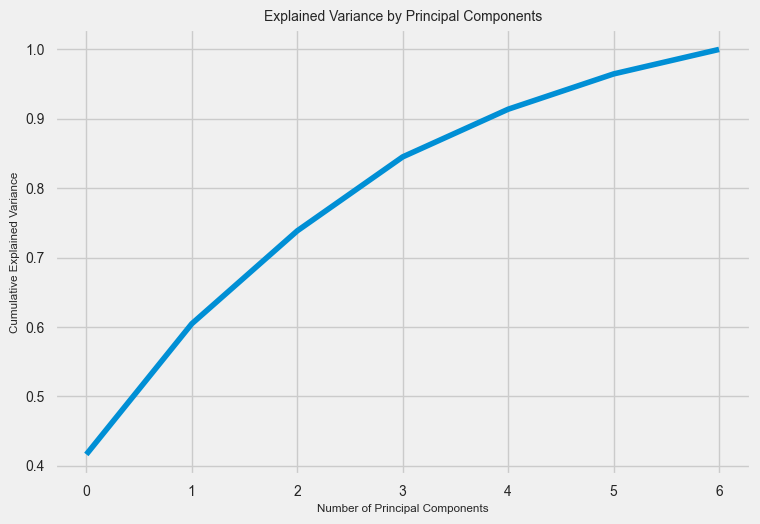

In [25]:
pca = PCA()
principal_components = pca.fit_transform(X_test)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [26]:
pca_df = pd.DataFrame(data=principal_components[:, :2], columns=["PC1", "PC2"])
pca_df

,PC1,PC2
0,0.322095,0.380465
1,-0.550190,-0.019872
2,0.458406,-0.090987
3,-0.234016,-0.233079
4,-0.039060,-0.197546
...,...,...
354,0.189133,0.626308
355,0.103653,-0.381267
356,0.099646,-0.329597
357,0.262085,-0.155306


In [27]:
y_test.value_counts()

Rating
3.50    76
3.25    70
3.00    69
2.75    50
3.75    38
2.50    24
4.00    16
2.00     6
2.25     5
1.50     3
1.00     1
5.00     1
Name: count, dtype: int64

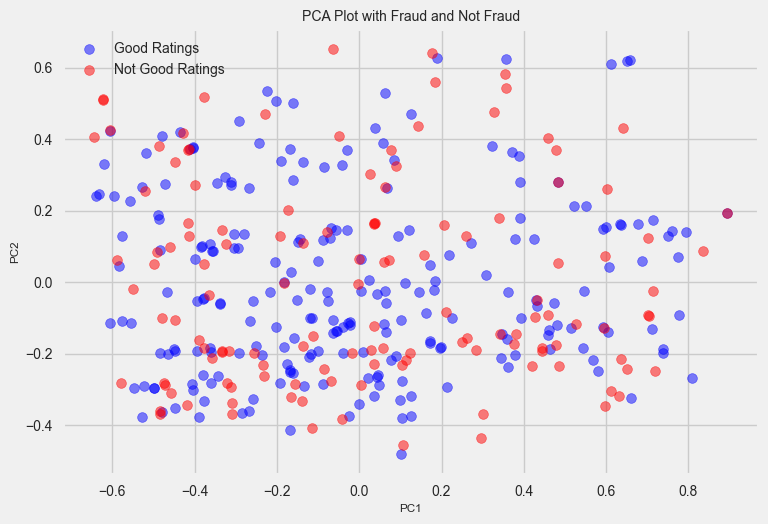

In [28]:
# Add the "Fraud" column to the PCA DataFrame
pca_df["Rating"] = y_test.values

# Separate the data based on the "Fraud" column
good_ratings = pca_df[pca_df["Rating"] >= 3.5]
not_good_ratings = pca_df[pca_df["Rating"] < 3.5]

# Scatter plot with different colors for "fraud" and "not fraud"
plt.scatter(not_good_ratings["PC1"], not_good_ratings["PC2"], c='blue', label='Good Ratings', alpha=0.5)
plt.scatter(good_ratings["PC1"], good_ratings["PC2"], c='red', label='Not Good Ratings', alpha=0.5)

# Additional plot customization if needed
plt.title('PCA Plot with Fraud and Not Fraud')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [29]:
y_test = y_test.map(lambda entry: 0 if entry < 3.5 else 1)
y_test

1234    0
220     1
1516    1
438     1
1268    0
       ..
1114    0
1729    0
1615    0
1036    1
964     0
Name: Rating, Length: 359, dtype: int64

c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

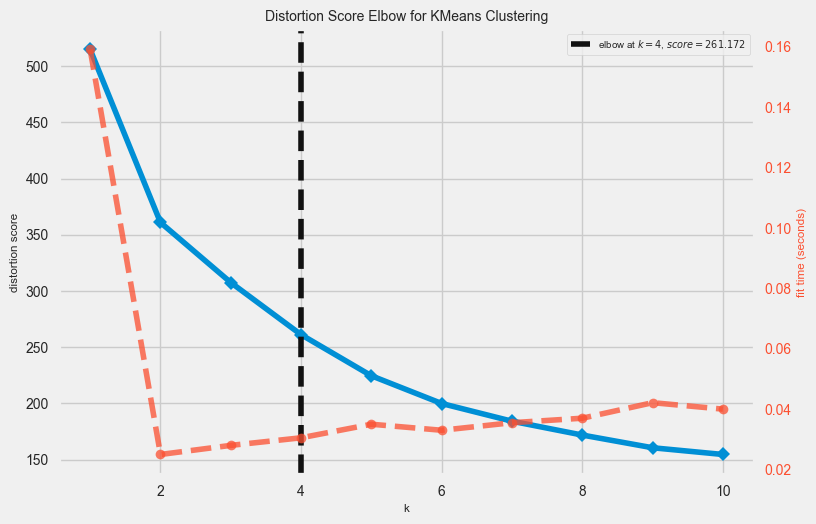

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [30]:
kmeans_model = KMeans()
kmeans_elbow_visualizer = KElbowVisualizer(kmeans_model, k=(1, 11))
kmeans_elbow_visualizer.fit(X_train)
kmeans_elbow_visualizer.show()

c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


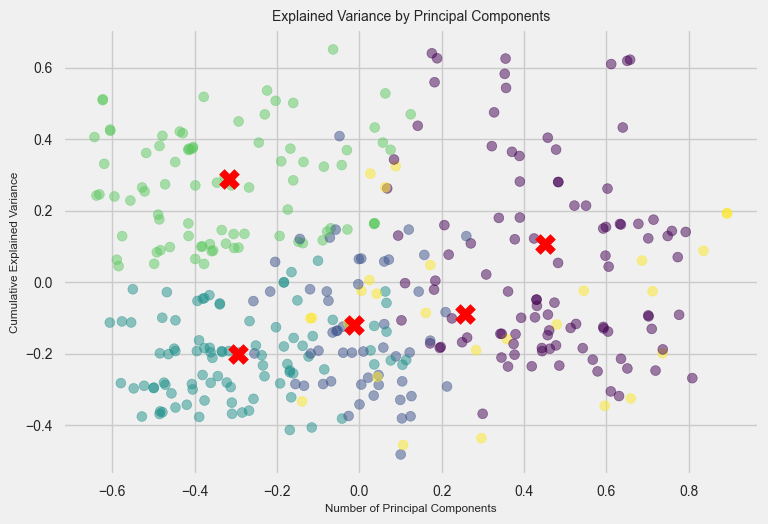

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1.

In [31]:
# Run the kmeans model on scaled data
kmeans_model = KMeans(n_clusters=5, random_state=42).fit(X_train)

# Get the cluster number for each datapoint
X_clusters = kmeans_model.predict(X_test)

# Save the cluster centroids
X_clusters_centers = kmeans_model.cluster_centers_

X_test_principal_clusters_centers = pca.transform(X_clusters_centers)
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=X_clusters, cmap='viridis', s=50, alpha=0.5)
plt.scatter(X_test_principal_clusters_centers[:, 0], X_test_principal_clusters_centers[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

# Obtain predictions and calculate distance from cluster centroid (using Euclidean Distance)
kmeans_dist = [np.linalg.norm(x - y) for x, y in zip(X_test, X_clusters_centers[X_clusters])]

y_pred = np.array(kmeans_dist)
y_pred[kmeans_dist >= np.percentile(kmeans_dist, 95)] = 1
y_pred[kmeans_dist < np.percentile(kmeans_dist, 95)] = 0
y_pred

ROC AUC Score: 52.06%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.645161    0.555556  0.640669    0.600358      0.612464
recall       0.964912    0.076336  0.640669    0.520624      0.640669
f1-score     0.773286    0.134228  0.640669    0.453757      0.540092
support    228.000000  131.000000  0.640669  359.000000    359.000000
_______________________________________________
Confusion Matrix:
[[220   8]
 [121  10]]


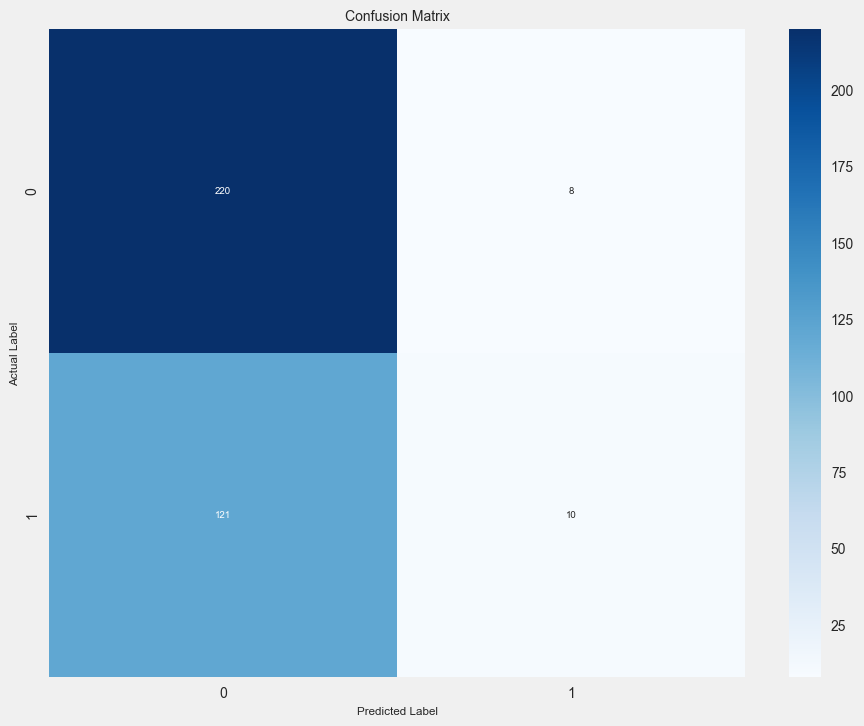

In [32]:
clf_report = pd.DataFrame(classification_report(y_true=y_test, y_pred=y_pred, output_dict=True, zero_division=0))
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

print(f"ROC AUC Score: {roc_auc_score(y_true=y_test, y_score=y_pred) * 100:.2f}%")
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{clf_report}")
print("_______________________________________________")
print(f"Confusion Matrix:\n{conf_matrix}")

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
plt.rcParams["font.size"] = 7
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

## Conclusions

-

-

-

## Reference Sources and Citations (IEEE Format)

To complete this blog post, I used the following online sources as references for developing this:

(CHANGE FORMAT)

- Data: https://www.kaggle.com/datasets/rtatman/chocolate-bar-ratings/data

- KMeans Elbow: https://www.kaggle.com/code/javigallego/outliers-eda-clustering-tutorial

- KMeans: https://www.kaggle.com/code/mohamedisbaine/fraud-detection